# TMDB Movie Dataset Analysis
Performing an Exploratory Data Analysis on TMDB movie dataset
## Table of Contents
* [Introduction](#intro)
* [Data Wrangling](#wrangling)
    * [General Properties](#general_properties)
    * [Data Cleaning](#data_cleaning)
* [Exploratory Data Analysis](#eda)
    * [Investigating Highest Grossing Movies](#eda_01)
    * [Investigating Highest Movies Based on Revenue to Budget Ratio](#eda_02)
    * [Investigating Correlation Between Release Months and Revenue](#eda_03)
    * [Investigating Highest Rated Movies](#eda_04)
    * [Investigating Most Popular Movies](#eda_05)
* [Conclusions](#conclusions)

<a class="anchor" id='intro'></a>
## Introduction 
> Looking to investigate TMDB movie dataset particularly trying to figure out what properties are associated with movies having high revenue (and profit), what properties leads to high ratings on movies and what properties are associated with popular movies.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

<a class="anchor" id='wrangling'></a>
## Data Wrangling 

> The data set, `tmdb-movies.csv`, contains information of about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue
<a class="anchor" id="general_properties"></a>
### General Properties 

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head(1)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


> We have about 21 columns in our dataset with some columns having rows with strings concatenated with `|` 
>
> Let's view complete column list and see their data types aswell.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

> We have `10866` rows in dataset a couple of floats, strings and integers. We can see some `nan` values aswell, will look at this below. The `release_date` column is of type string, we might want to change this.
>
> We have 2 id columns `id` and `imdb_id`, would probably just need one of them. I would check later if I can uniquely identify rows with both before droping.
>
> The columns `budget_adj` and `revenue_adj` are the `budget` and `revenue` of the movies adjusted for inflation in terms of 2010 dollars. Would be using those instead of the `budget` and `revenue` columns.
>
> Lets look at the `nan` values clearly.

In [4]:
nan_vals = df.isnull().sum()
nan_vals.where(nan_vals > 0).dropna()

imdb_id                   10.0
cast                      76.0
homepage                7930.0
director                  44.0
tagline                 2824.0
keywords                1493.0
overview                   4.0
genres                    23.0
production_companies    1030.0
dtype: float64

In [5]:
df[['homepage', 'tagline', 'keywords', 'overview']].head()

,homepage,tagline,keywords,overview
0,http://www.jurassicworld.com/,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...
1,http://www.madmaxmovie.com/,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...
2,http://www.thedivergentseries.movie/#insurgent,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...
3,http://www.starwars.com/films/star-wars-episod...,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...
4,http://www.furious7.com/,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...


> Although `homepage`, `tagline`, `keywords` and `overview` has importance when discovering a movie, I don't think I would be doing much with them so would be dropping them. We will also be dropping `imdb_id` and will be using `id` column instead.
>
> For `nan` values in `cast`, `director`, `genres` and `production_companies` we will handle those later. In the mean time, let's get some summary statistics

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>More than 50 percent of the data has a `budget` and `revenue` of 0. We can also see a movie with 0 runtime. Hmmm, this might be cases of incorrect entry or not having the information.
>
>Let's view histograms of a few of the columns.

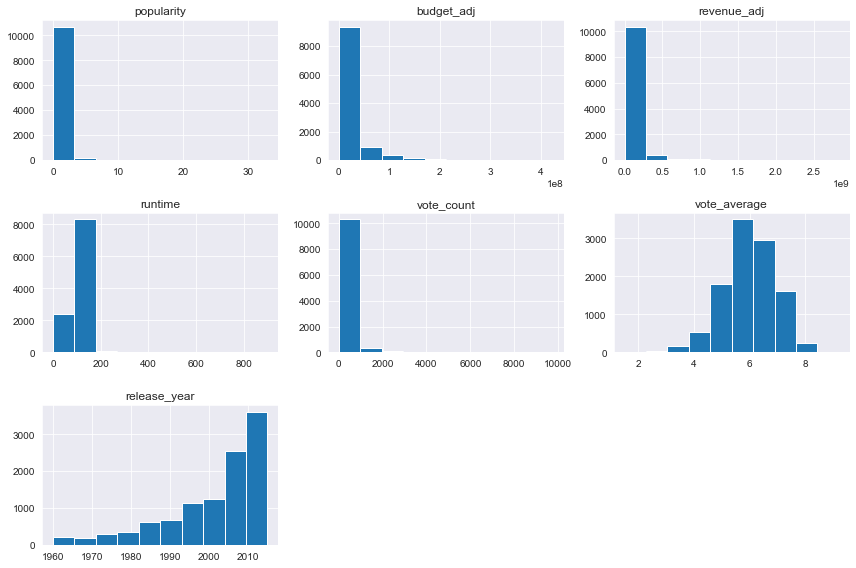

In [7]:
df[['popularity', 'budget_adj', 'revenue_adj', 'runtime', 'vote_count', 'vote_average', 'release_year']].hist(figsize=(12, 8))
plt.tight_layout();

> The `popularity`, `budget_adj`, `revenue_adj`, `runtime`, `vote_count` are all skewed to the right. This quite confirm most movies having about `0` `budget` and `revenue`, it also shows that most movies have runtimes of about `0 - 180 mins`. The `vote_average` has a normal distribution and there are more movies being released in recent times than before `1990`. 
>
> Let's get closer into the budget and revenue.

In [8]:
df.query('budget == 0 and revenue == 0').head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.0,0.0
75,308369,tt2582496,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,http://www.foxsearchlight.com/meandearlandthed...,Alfonso Gomez-Rejon,A Little Friendship Never Killed Anyone.,...,Greg is coasting through senior year of high s...,105,Comedy|Drama,Indian Paintbrush,6/12/15,569,7.7,2015,0.0,0.0


> The two cases above seems to be missing financial information about the movie as with [Mythica: The Darkspore](https://www.themoviedb.org/movie/347096-mythica-2-the-darkspore) and [Me and Earl and the Dying Girl](https://www.themoviedb.org/movie/308369-me-and-earl-and-the-dying-girl).

In [9]:
df.query('budget < 1000 or revenue < 1000').head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.000000e+00,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.000000e+00,2.056620e+07
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.000000e+00
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.000000e+00
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.000000e+00,4.222338e+04


> Here we can see cases of missing `budget` data and missing `revenue` data. 
>
>I am using `< 1000` because I have found that the data becomes consistent from `budget` and `revenue` data above `1000`. For example, the movie [The Karate Kid, Part II](https://www.themoviedb.org/movie/8856-the-karate-kid-part-ii) has significant `budget` but was entered here as having a budget of `113`, same with the the movie [Into the Night](https://www.imdb.com/title/tt0089346/) entered as having the budget `114`.

In [10]:
df.query('budget < 1000 or revenue < 1000').shape

(7046, 21)

> Wow, that's a significant amount of information to drop but I think I can make do with 3000 correct data. I believe droping these rows will handle the `nan` values in `cast`, `director`, `genres` and `production_companies`.
>
> Let's see if there are any duplicates.

In [11]:
df.duplicated().sum()

1

> We have one duplicate data. Let's move to cleaning.

<a class="anchor" id="data_cleaning"></a>
### Data Cleaning 
#### Drop columns `imdb_id`, `budget`, `revenue`, `homepage`, `tagline`, `keywords` and `overview` 

In [12]:
df.drop(['imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'keywords', 'overview'], axis=1, inplace=True)
df.head(0)

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


#### Renaming a couple of columns
>`{"original_title":  "title"}`, `{"vote_count":  "rate_count"}`, `{"vote_average":  "rating"}`, `{"budget_adj":  "budget"}` and `{"revenue_adj":  "revenue"}`. Doing this just for convinient usage.

In [13]:
df.rename(columns={"original_title":  "title", "vote_count":  "rate_count", "vote_average":  "rating", "budget_adj":  "budget", "revenue_adj":  "revenue"}, inplace=True)
df.head(0)

,id,popularity,title,cast,director,runtime,genres,production_companies,release_date,rate_count,rating,release_year,budget,revenue


#### Drop rows with `budget` and `revenue` less than `1000`

In [14]:
df = df.query('budget > 1000 and revenue > 1000')
df.shape

(3820, 14)

#### Drop `nan` values

In [15]:
df.dropna(inplace=True)
df.shape

(3773, 14)

#### Drop duplicate values

In [16]:
df.drop_duplicates(inplace=True)
df.shape

(3772, 14)

#### Change `release_date` from `string` to `datetime`

In [17]:
# First format the release date to mm/dd/yyyy
for i in df.index:
    df.loc[i, 'release_date'] = df.release_date[i][:-2] + str(df.release_year[i])

df.head(1)

,id,popularity,title,cast,director,runtime,genres,production_companies,release_date,rate_count,rating,release_year,budget,revenue
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,1.379999e+08,1.392446e+09


In [18]:
# Now change from string to datetime
df['release_date'] = pd.to_datetime(df['release_date'])
df.release_date.dtype

dtype('<M8[ns]')

#### Create `profit` column which would be `revenue - budget`

In [19]:
df['profit'] = df.revenue - df.budget
df.shape

(3772, 15)

#### Create function to expand string row
> Some columnns have row with string values concatenated with `|`, will be creating a function here to expand those rows. I will not perform the expansion yet so I don't over explode the dataset, will do so when I need to.

In [20]:
# Function that splits columns with concatenated string rows
def split_column(dframe, column, sep):
    new_df = pd.DataFrame(columns=dframe.columns) # Create empty DataFrame
    new_df = new_df.astype(dframe.dtypes) # Making sure new_df is of same type as the dataframe passed in
    nrows = dframe.shape[0] # number of rows in dataframe
    for i in range(nrows):
        row = dframe.iloc[i]
        if row.isnull()[column]: # Check for 'nan' values
            new_df = new_df.append(row, ignore_index=True) # If nan, just append original column
        else:
            items = row[column].split(sep)
            for item in items:
                row_copy = row.copy()
                row_copy[column] = item
                new_df = new_df.append(row_copy, ignore_index=True)
                
    return new_df

#### Visualizing data after cleaning

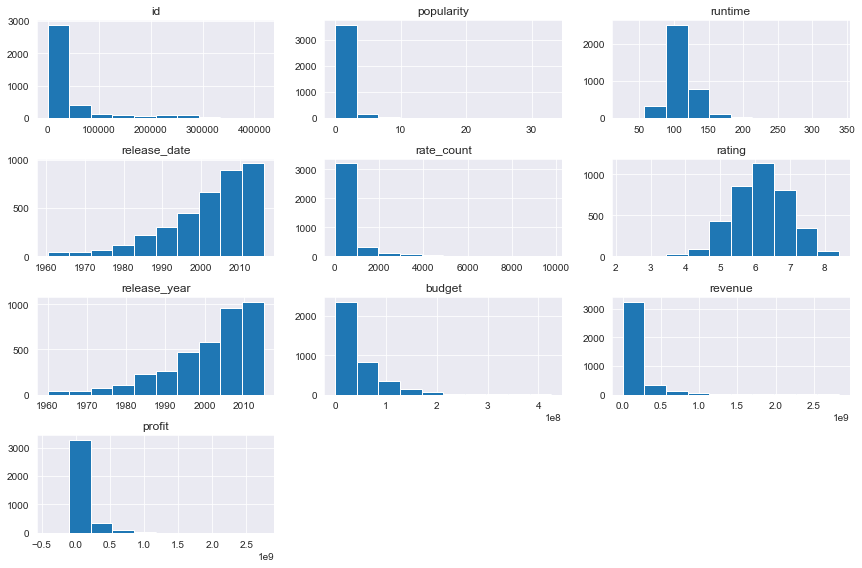

In [21]:
df.hist(figsize=(12, 8))
plt.tight_layout();

<a class="anchor" id='eda'></a>
## Exploratory Data Analysis (EDA)

In [22]:
# Defining standard colors for plot
std_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

<a class="anchor" id="eda_01"></a>
### Investigating Highest Grossing Movies

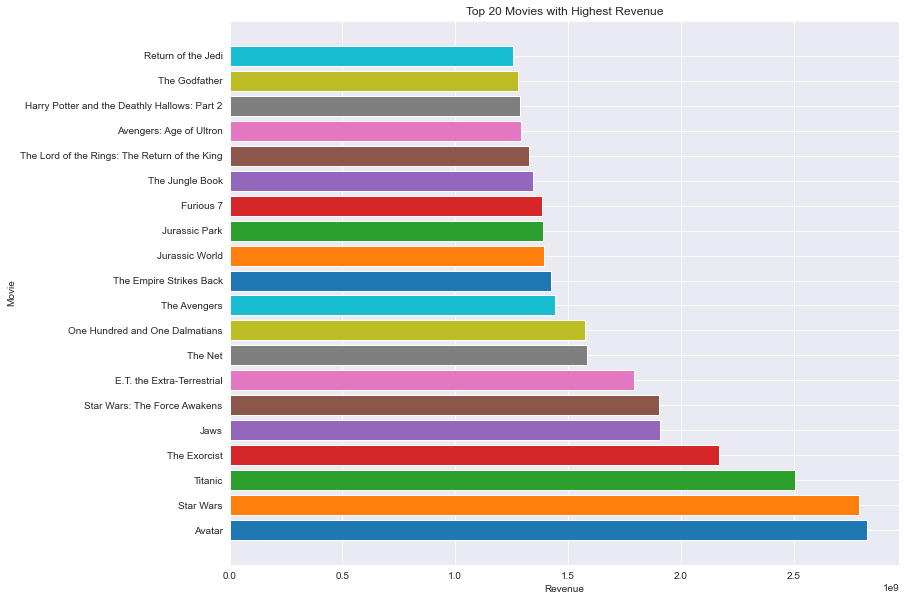

In [23]:
highest_r20 = df.sort_values('revenue', ascending=False).head(20)
plt.figure(figsize=(12, 10))
plt.barh(highest_r20.title, highest_r20.revenue, color=std_colors)
plt.title('Top 20 Movies with Highest Revenue')
plt.xlabel('Revenue')
plt.ylabel('Movie');

> **Avatar** seems to be toping the list with a revenue of about `$2.8e9` followed closely by **Star Wars**. The last on the list is **Return of the Jedi** (Part of Star Wars).
>
> Let's look at what `genre` is most prominant in this list.

#### Most Prominent `genres` in Top 20 Revenue List 

In [24]:
# First let's expand the genres column of the highest_r20 list
highest_r20_gexp = split_column(highest_r20, 'genres', '|') # gexp -> genres expanded
highest_r20_gexp.shape

(65, 15)

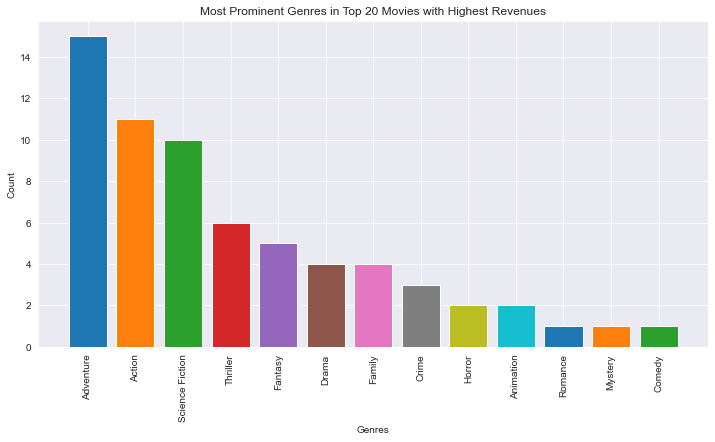

In [25]:
genres_data = highest_r20_gexp.genres.value_counts()

plt.figure(figsize=(12, 6))
plt.bar(genres_data.index, genres_data, color=std_colors)
plt.title('Most Prominent Genres in Top 20 Movies with Highest Revenues')
plt.xlabel('Genres')
plt.xticks(rotation=90)
plt.ylabel('Count');

> **Adventure** leading in about `15` of the `20` movies followed closely by **Action** in about `11` of the `20` movies. And then **Science Fiction**, **Thriller** ...
>
> Let's try to see which of the top 20 movies had actual profits.

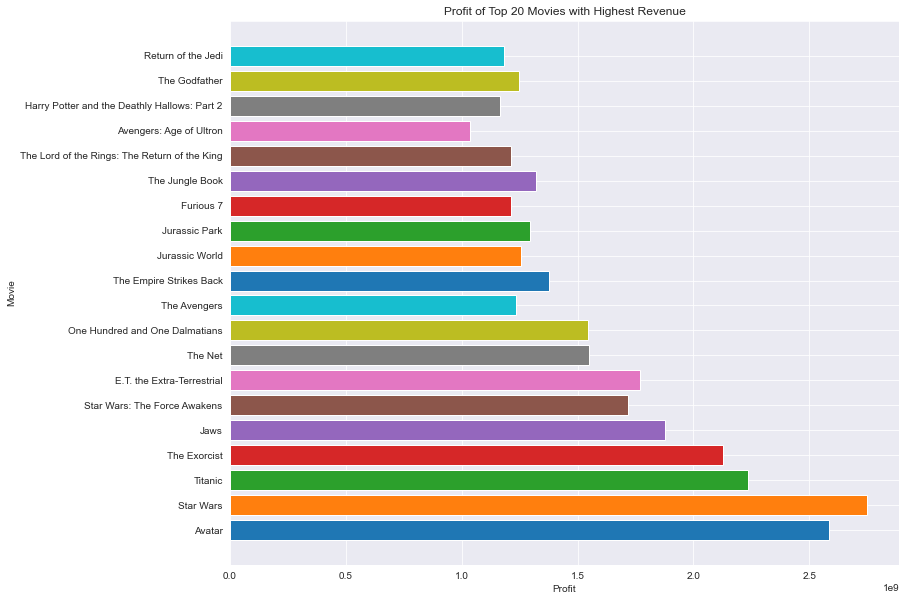

In [26]:
plt.figure(figsize=(12, 10))
plt.barh(highest_r20.title, highest_r20.profit, color=std_colors)
plt.title('Profit of Top 20 Movies with Highest Revenue')
plt.xlabel('Profit')
plt.ylabel('Movie');

> Seems the trend is about consistent with the `revenue` for this top 20 list, they all made substantial profit on their budget. 
>
> While studying the dataset, I saw that movies in the genre where action figures and toys can be made from mostly genrate more profit than others. 
>
> Let's see the genres for a couple of this movies

In [27]:
highest_r20[['title', 'genres', 'release_year']].head(10)

,title,genres,release_year
1386,Avatar,Action|Adventure|Fantasy|Science Fiction,2009
1329,Star Wars,Adventure|Action|Science Fiction,1977
5231,Titanic,Drama|Romance|Thriller,1997
10594,The Exorcist,Drama|Horror|Thriller,1973
9806,Jaws,Horror|Thriller|Adventure,1975
3,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,2015
8889,E.T. the Extra-Terrestrial,Science Fiction|Adventure|Family|Fantasy,1982
8094,The Net,Crime|Drama|Mystery|Thriller|Action,1995
10110,One Hundred and One Dalmatians,Adventure|Animation|Comedy|Family,1961
4361,The Avengers,Science Fiction|Action|Adventure,2012


> I looked at the top 5 movies on this list and I found **action figures** for all of them, so it's possible that **action figure** sales correlates with high revenue. It also shows that **action figures** production aren't particlar to any specific genre, I found figures for `action`, `adventure`, `horror`, `drama`, `romance`... 
>
> Let have a look at revenue to budget ratio, I am curios to see what movies make it to the top of that list.

<a class="anchor" id="eda_02"></a>
### Investigating Highest Movies Based on Revenue to Budget Ratio

In [28]:
# First we add a revenue to budget column to our dataset named rb_ratio
df['rb_ratio'] = df.revenue / df.budget
df.head(1)

,id,popularity,title,cast,director,runtime,genres,production_companies,release_date,rate_count,rating,release_year,budget,revenue,profit,rb_ratio
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,10.090192


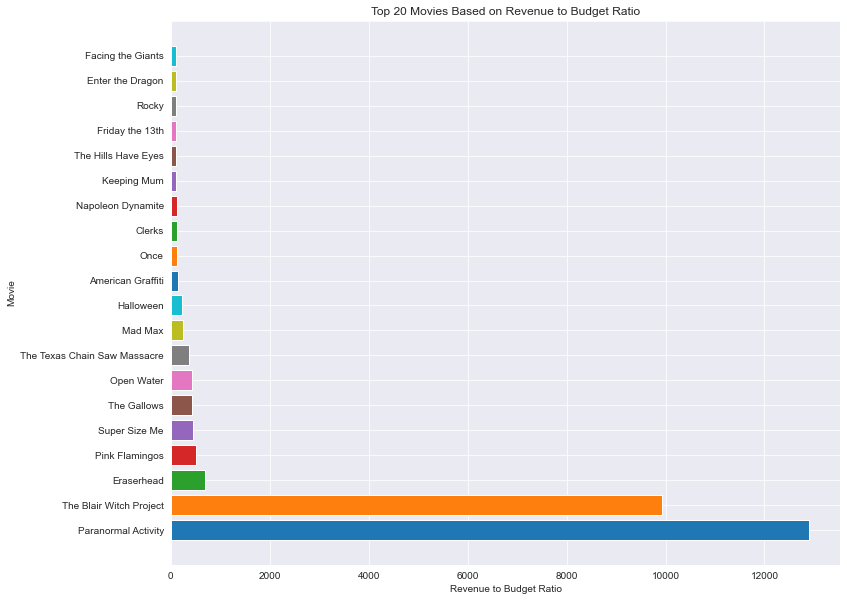

In [29]:
highest_rbr20 = df.sort_values('rb_ratio', ascending=False).head(20) # rbr -> revenue to budget ratio
plt.figure(figsize=(12, 10))
plt.barh(highest_rbr20.title, highest_rbr20.rb_ratio, color=std_colors)
plt.title('Top 20 Movies Based on Revenue to Budget Ratio')
plt.xlabel('Revenue to Budget Ratio')
plt.ylabel('Movie');

> Hmmm... Seems our big bucks movies didn't make it to this list. Let's see what `genres` are most prominent in this list.
#### Most Prominent `genres` in Top 20 Movies Based on Revenue to Budget Ratio

In [30]:
highest_rbr20_gexp = split_column(highest_rbr20, 'genres', '|')
highest_rbr20_gexp.shape

(39, 16)

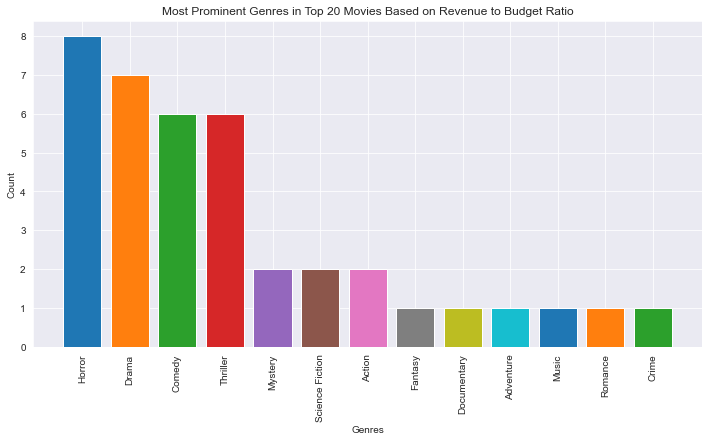

In [31]:
genre_data = highest_rbr20_gexp.genres.value_counts()

plt.figure(figsize=(12, 6))
plt.bar(genre_data.index, genre_data, color=std_colors)
plt.title('Most Prominent Genres in Top 20 Movies Based on Revenue to Budget Ratio')
plt.xlabel('Genres')
plt.xticks(rotation=90)
plt.ylabel('Count');

> Seems there is a correlation between movies in `genres` **Horror**, **Drama**, **Comedy**, **Thriller**... and movies that made substantial earnings on low investment. 
>
> Let's see how this group profit compares with our the group of highest revenue.

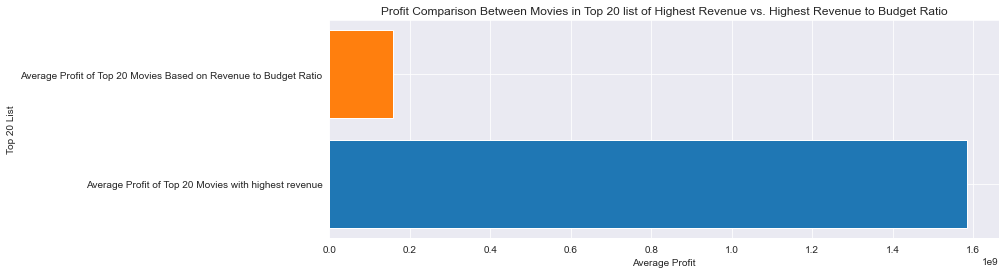

In [32]:
tick_label = ['Average Profit of Top 20 Movies with highest revenue', 'Average Profit of Top 20 Movies Based on Revenue to Budget Ratio']
plt.figure(figsize=(12, 4))
plt.barh(tick_label, [highest_r20.profit.mean(), highest_rbr20.profit.mean()], color=std_colors)
plt.title('Profit Comparison Between Movies in Top 20 list of Highest Revenue vs. Highest Revenue to Budget Ratio')
plt.xlabel('Average Profit')
plt.ylabel('Top 20 List');

> The top 20 movies based on revenue to budget ratio doesn't seem to compare so much with those with highest revenue (I guess "You spend money to make money" 😄), but this dataset shows a correlation between movies of the genres `Horror`, `Drama`, `Comedy`, `Thriller`... with high returns on investment. 
>
> Let's visualize the consistency of this trend with time.

#### Visualizing consistency of trend with time

In [33]:
# We will be divide the dataset into 10 equal part based on release year and then find genres toping in each of those deciles.
decile_label = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
df['decile_year'] = pd.qcut(df.release_year, 10, labels=decile_label)
df.shape

(3772, 17)

In [34]:
# No we create 2 datasets by selecting top 20 movies in each decile based highest ranking for 1st dataset and highest
# revenue to budget ratio for the other.

highest_r20_wt = pd.DataFrame(columns=df.columns) # wt -> with time
highest_r20_wt = highest_r20_wt.astype(df.dtypes)
highest_rbr20_wt = pd.DataFrame(columns=df.columns) 
highest_rbr20_wt = highest_rbr20_wt.astype(df.dtypes)

# Getting the year range value for each decile in a dict
decile_year_range_label = {}

for i in range(1, 11):
    decile_partition = df.query('decile_year == @i')
    highest_r20_wt = highest_r20_wt.append(decile_partition.sort_values('revenue', ascending=False).head(20), ignore_index=True)
    highest_rbr20_wt = highest_rbr20_wt.append(decile_partition.sort_values('rb_ratio', ascending=False).head(20), ignore_index=True)
    
    decile_year_range_label[i] = "{} - {}".format(decile_partition.release_year.min(), decile_partition.release_year.max())
    
highest_r20_wt.shape, highest_rbr20_wt.shape, decile_year_range_label

((200, 17),
 (200, 17),
 {1: '1960 - 1985',
  2: '1986 - 1993',
  3: '1994 - 1998',
  4: '1999 - 2001',
  5: '2002 - 2004',
  6: '2005 - 2007',
  7: '2008 - 2009',
  8: '2010 - 2011',
  9: '2012 - 2013',
  10: '2014 - 2015'})

In [35]:
# Expanding the genre column
highest_r20_wt_gexp = split_column(highest_r20_wt, 'genres', '|')
highest_rbr20_wt_gexp = split_column(highest_rbr20_wt, 'genres', '|')
highest_r20_wt_gexp.shape, highest_rbr20_wt_gexp.shape

((641, 17), (470, 17))

In [36]:
# For each decile, count the occurrance of each genre 
highest_r20_wt_gexp_gcount_pd = highest_r20_wt_gexp.groupby('decile_year').genres.value_counts() # gcount_pd -> genre count per decile
highest_rbr20_wt_gexp_gcount_pd = highest_rbr20_wt_gexp.groupby('decile_year').genres.value_counts()

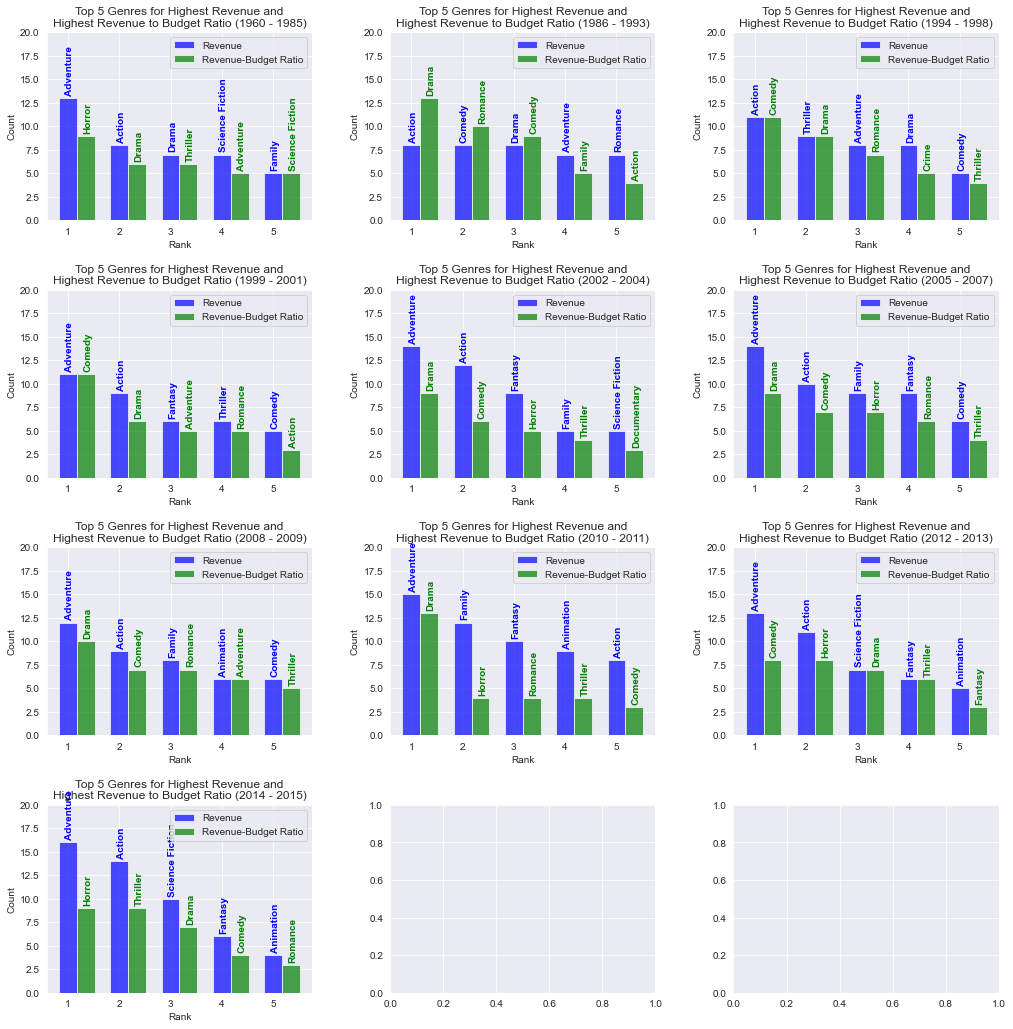

In [37]:
# Plotting
# First create width for bars
width = 0.35
rank = np.array([1, 2, 3, 4, 5]) # This is the rank of each genre in each decile 

fig, axs = plt.subplots(4, 3, figsize=(15, 15))
fig.tight_layout(pad=5)
nrows, ncols = 0, 0

# Plotting just the top 5 genres in each decile and category
for i in range(1, 11):
    highest_rbar = axs[nrows, ncols].bar(rank, highest_r20_wt_gexp_gcount_pd[i][:5], width, color='b', alpha=.7, label='Revenue') 
    highest_rbrbar = axs[nrows, ncols].bar(rank + width, highest_rbr20_wt_gexp_gcount_pd[i][:5], width, color='g', alpha=.7, label='Revenue-Budget Ratio')
    
    # title and labels
    axs[nrows, ncols].set_title('Top 5 Genres for Highest Revenue and\nHighest Revenue to Budget Ratio ({})'.format(decile_year_range_label[i]))
    axs[nrows, ncols].set(xlabel='Rank', ylabel='Count')
    
    # Annotation (can use axs.annotate() for same task)
    axs[nrows, ncols].set_ylim(top=20)
    for j in range(5):
        axs[nrows, ncols].text(rank[j]-0.05, highest_r20_wt_gexp_gcount_pd[i][j] + 0.5, highest_r20_wt_gexp_gcount_pd[i].index[j], rotation=90, color='blue', fontweight='bold')
        axs[nrows, ncols].text(rank[j]+width-0.05, highest_rbr20_wt_gexp_gcount_pd[i][j] + 0.5, highest_rbr20_wt_gexp_gcount_pd[i].index[j], rotation=90, color='green', fontweight='bold')
        
    # legend
    axs[nrows, ncols].legend()
    
    ncols += 1
    if ncols == 3: 
        ncols = 0
        nrows += 1

> We can see the trend is about same with **Adventur**, **Action**, **Fantasy**... maintaining top possitions for **Highest Revenue Movies** for each `release_year` segment while **Horror**, **Drama**, **Thriller**, **Comedy** maintaining top possitions for movies with **Highest Revenue to Budget Ratio** for each `release_year` segment.
>
> Let's see companies in this two list

#### Production Companies of Top 20 Highest Revenue and Hightest Revenue to Budget Ratio Movies

In [38]:
highest_r20_pcexp = split_column(highest_r20, 'production_companies', '|') # pcexp -> production_company expanded
highest_rbr20_pcexp = split_column(highest_rbr20, 'production_companies', '|') 
highest_r20_pcexp.shape, highest_rbr20_pcexp.shape

((48, 15), (41, 16))

In [39]:
# Group by companies and find the mean of revenue
highest_r20_pcrmean = highest_r20_pcexp.groupby('production_companies').revenue.mean() # pcrmean -> production_company revenue mean

# Group by companies and find the mean of rb_ratio
highest_rbr20_pcrbrmean = highest_rbr20_pcexp.groupby('production_companies').rb_ratio.mean()

# Sort and extract top 10 from both list
top_10_hr = highest_r20_pcrmean.sort_values(ascending=False)[:10]
top_10_hrbr = highest_rbr20_pcrbrmean.sort_values(ascending=False)[:10]

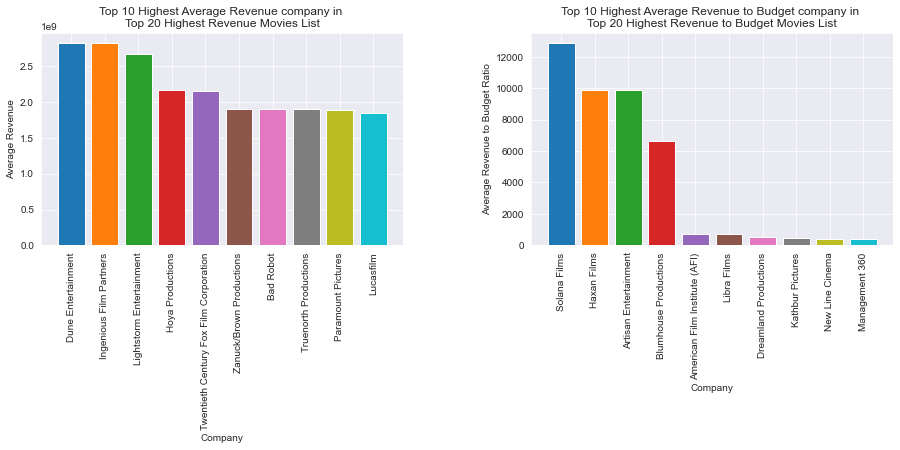

In [40]:
# Ploting
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
fig.tight_layout(pad=10.0)

# Top 10 Highest revenue companies
axs[0].bar(top_10_hr.index, top_10_hr, color=std_colors)
axs[0].set_title('Top 10 Highest Average Revenue company in \nTop 20 Highest Revenue Movies List')
axs[0].set(xlabel='Company', ylabel='Average Revenue')
axs[0].tick_params(axis='x', rotation=90)

# Top 10 Highest revenue to budget ratio companies
axs[1].bar(top_10_hrbr.index, top_10_hrbr, color=std_colors)
axs[1].set_title('Top 10 Highest Average Revenue to Budget company in \nTop 20 Highest Revenue to Budget Movies List')
axs[1].set(xlabel='Company', ylabel='Average Revenue to Budget Ratio')
axs[1].tick_params(axis='x', rotation=90)

<a class="anchor" id="eda_03"></a>
### Investigating Correlation Between Release Months and Revenue

In [41]:
# First create a column for release month
df['release_month'] = df.release_date.dt.month
df.shape

(3772, 18)

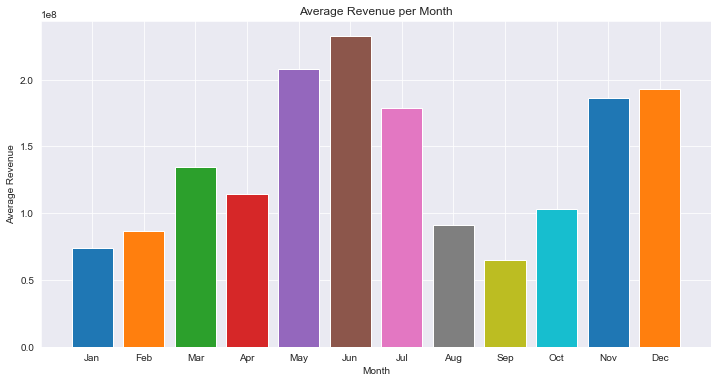

In [42]:
avg_rpm = df.groupby('release_month').revenue.mean() # rpm -> revenue per month
month_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(12, 6))
plt.bar(avg_rpm.index, avg_rpm, color=std_colors)
plt.title('Average Revenue per Month')
plt.xlabel('Month')
plt.xticks(avg_rpm.index, month_label)
plt.ylabel('Average Revenue');

> Seems the months of **May, June, July, November and December** are the best times to release movies.

<a class="anchor" id="eda_04"></a>
### Investigating Highest Rated Movies

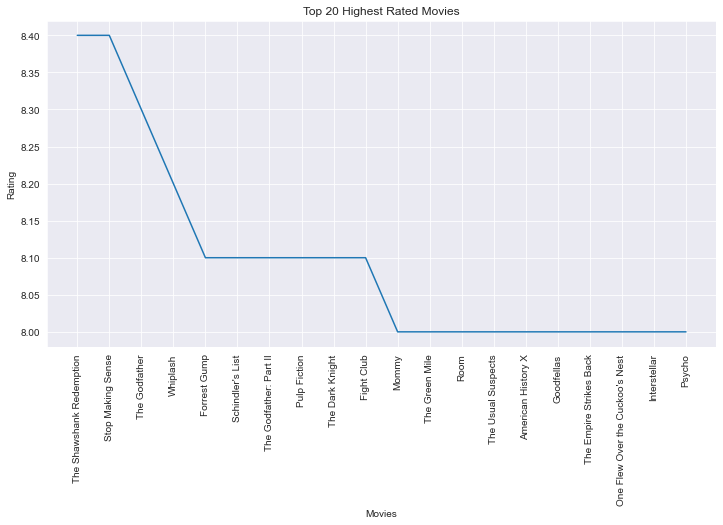

In [43]:
highest_rated20 = df.sort_values('rating', ascending=False).head(20)
plt.figure(figsize=(12, 6))
plt.plot(highest_rated20.title, highest_rated20.rating)
plt.title('Top 20 Highest Rated Movies')
plt.xticks(rotation=90)
plt.xlabel('Movies')
plt.ylabel('Rating');

#### Most Prominent Genres in Highest Rated Movies

In [44]:
# First expanding the genre column
highest_rated20_gexp = split_column(highest_rated20, 'genres', '|')
highest_rated20_gexp.shape

(45, 18)

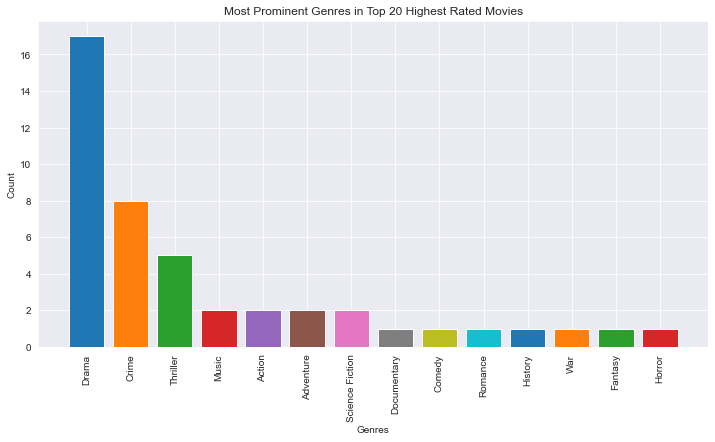

In [45]:
genre_data = highest_rated20_gexp.genres.value_counts()

plt.figure(figsize=(12, 6))
plt.bar(genre_data.index, genre_data, color=std_colors)
plt.title('Most Prominent Genres in Top 20 Highest Rated Movies')
plt.xlabel('Genres')
plt.xticks(rotation=90)
plt.ylabel('Count');

> Seems people rate **Drama**, **Crime** and **Thriller** more than other genres.
>
> Let's see how runtime correlates with viewers rating.

#### Correlation Between Runtime and Viewers Rating

In [46]:
# First devide the data into decile based on runtime
df['decile_runtime'] = pd.qcut(df.runtime, 10)
df.decile_runtime.value_counts()

(101.0, 106.0]    433
(89.0, 94.0]      431
(94.0, 98.0]      399
(25.999, 89.0]    395
(110.0, 116.0]    394
(123.0, 134.0]    368
(134.0, 338.0]    367
(116.0, 123.0]    362
(106.0, 110.0]    318
(98.0, 101.0]     305
Name: decile_runtime, dtype: int64

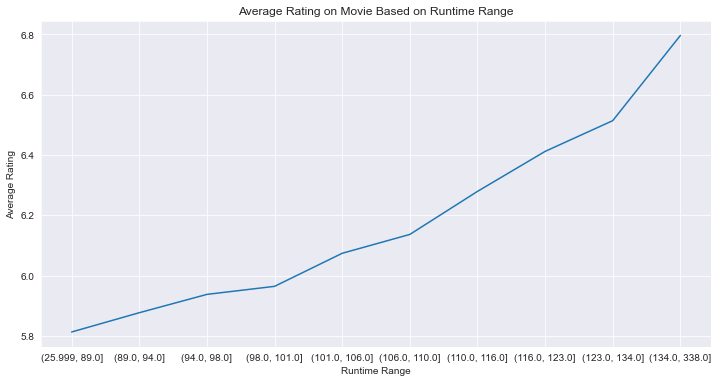

In [47]:
# Find average rating for each section 
q_avg_rating = df.groupby('decile_runtime').rating.mean()

# Ploting
plt.figure(figsize=(12, 6))
plt.plot(q_avg_rating.index.astype(str), q_avg_rating)
plt.title('Average Rating on Movie Based on Runtime Range')
plt.xlabel('Runtime Range')
plt.ylabel('Average Rating');

> Hmmm... Viewers rating tends upward as movie runtime increase so people generally enjoy longer movies. 
> 
> Let me look at this with a moving average instead, I am getting a feeling I might be missing out on some information.

In [48]:
df['mratingavg_20'] = df.sort_values('runtime').rating.rolling(20).mean()

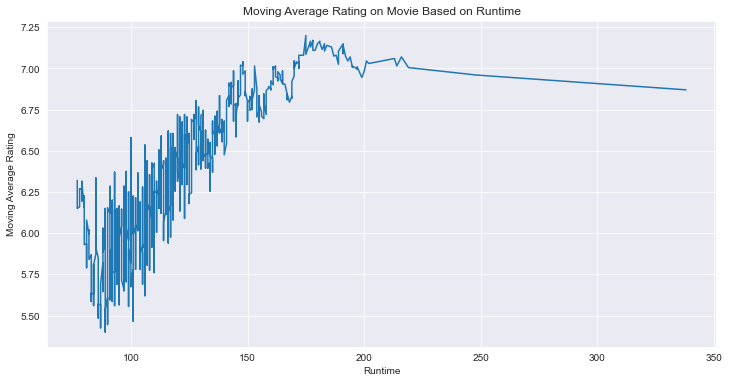

In [49]:
sorted_runtime = df.sort_values('runtime')

plt.figure(figsize=(12, 6))
plt.plot(sorted_runtime.runtime, sorted_runtime.mratingavg_20)
plt.title('Moving Average Rating on Movie Based on Runtime')
plt.xlabel('Runtime')
plt.ylabel('Moving Average Rating');

> We can see similay positive correlation between `rating` and `runtime` which then flattens toward runtime of about 200 and above at around rating `6.75 to 7.00`.

<a class="anchor" id="eda_05"></a>
### Investigating Most Popular Movies

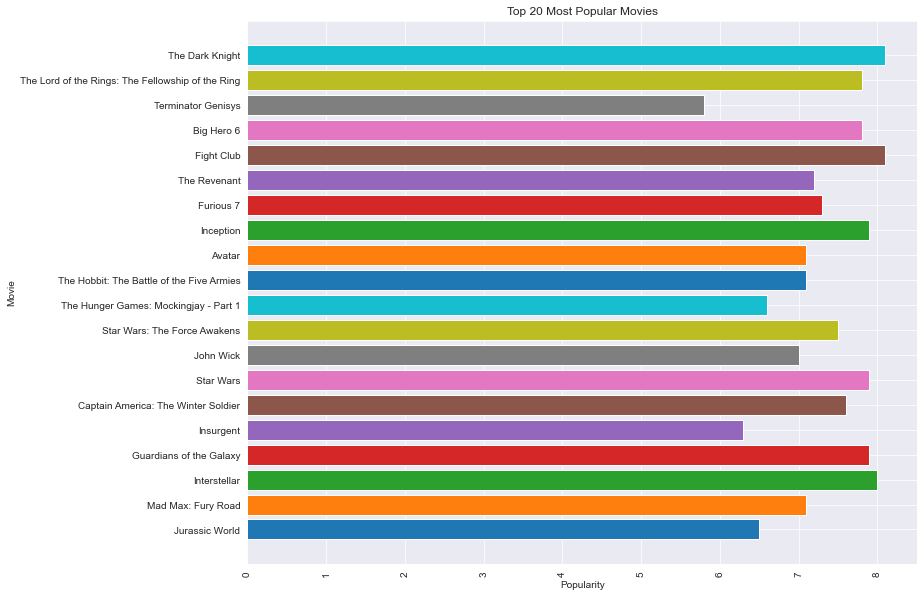

In [50]:
most_popular20 = df.sort_values('popularity', ascending=False).head(20)
plt.figure(figsize=(12, 10))
plt.barh(most_popular20.title, most_popular20.rating, color=std_colors)
plt.title('Top 20 Most Popular Movies')
plt.xticks(rotation=90)
plt.xlabel('Popularity')
plt.ylabel('Movie');

#### Most Prominent Genres in Highest Rated Movies

In [51]:
# First expanding the genre column
most_popular20_gexp = split_column(most_popular20, 'genres', '|')
most_popular20_gexp.shape

(67, 20)

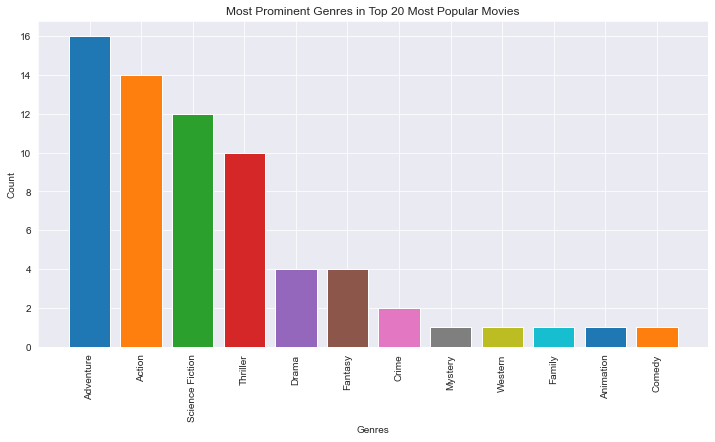

In [52]:
genre_data = most_popular20_gexp.genres.value_counts()

plt.figure(figsize=(12, 6))
plt.bar(genre_data.index, genre_data, color=std_colors)
plt.title('Most Prominent Genres in Top 20 Most Popular Movies')
plt.xlabel('Genres')
plt.xticks(rotation=90)
plt.ylabel('Count');

> Looks almost similar to the Highest revenue list, **Adventure**, **Action**, **Science Fiction**, **Thriller**... movies tends to be most popular.
>
> Lets see how this trends copes with time.

#### Visualizing Consistency of Trend with Time

In [53]:
# We still have the data partitioned into decile based on release year, so we will be using that.
# In each decile we want to find out which 5 genre is most popular

# We select top 20 movies in each decile based on popularity
most_popular_wt = pd.DataFrame(columns=df.columns) # wt -> with time
most_popular_wt = most_popular_wt.astype(df.dtypes)

for i in range(1, 11):
    decile_partition = df.query('decile_year == @i')
    most_popular_wt = most_popular_wt.append(decile_partition.sort_values('popularity', ascending=False).head(20), ignore_index=True)

# We have also previously created the decile_year_range_label
most_popular_wt.shape, decile_year_range_label

((200, 20),
 {1: '1960 - 1985',
  2: '1986 - 1993',
  3: '1994 - 1998',
  4: '1999 - 2001',
  5: '2002 - 2004',
  6: '2005 - 2007',
  7: '2008 - 2009',
  8: '2010 - 2011',
  9: '2012 - 2013',
  10: '2014 - 2015'})

In [54]:
# Now expand the genre column
most_popular_wt_gexp = split_column(most_popular_wt, 'genres', '|')
most_popular_wt_gexp.shape

(628, 20)

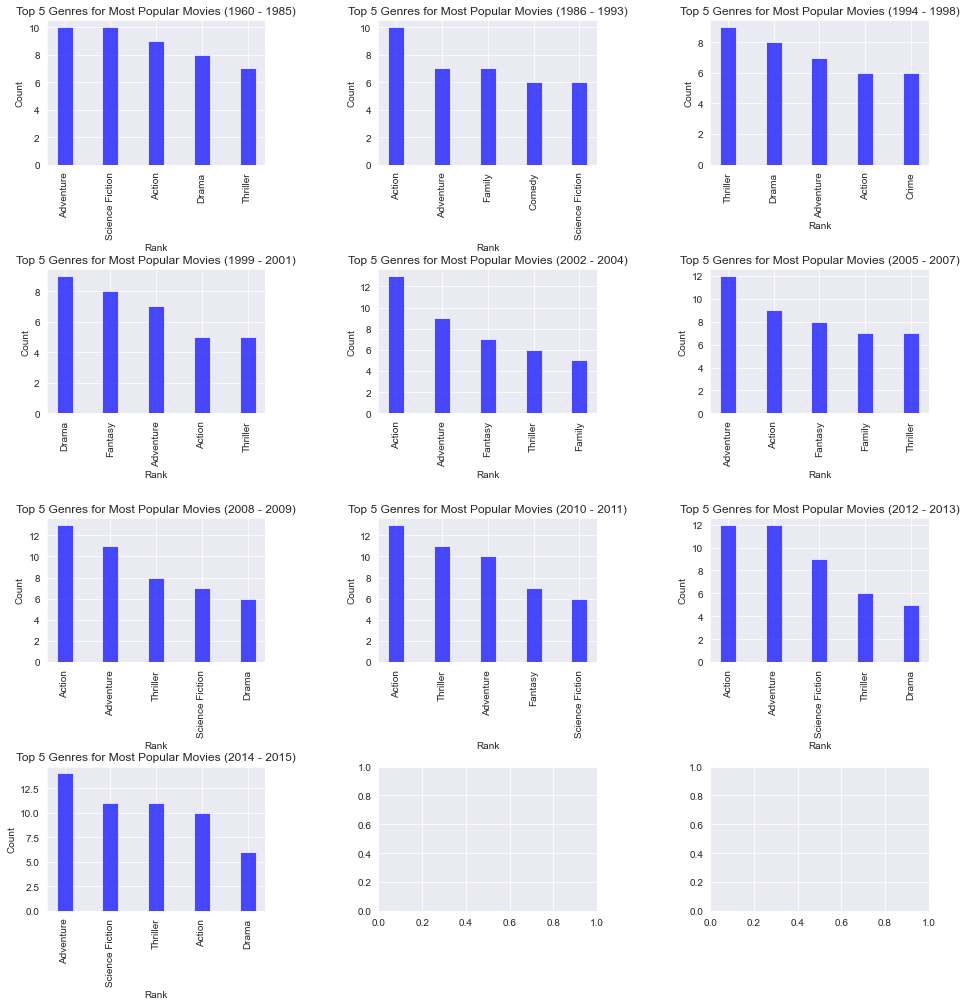

In [55]:
# For each decile, count the occurrance of each genre 
most_popular_wt_gexp_gcount_pd = most_popular_wt_gexp.groupby('decile_year').genres.value_counts() # gcount_pd -> genre count per decile

# Plotting
# First create width for bars
width = 0.35

fig, axs = plt.subplots(4, 3, figsize=(15, 15))
fig.tight_layout(pad=8.5)
nrows, ncols = 0, 0

# Plotting just the top 5 genres in each decile and category
for i in range(1, 11):
    axs[nrows, ncols].bar(most_popular_wt_gexp_gcount_pd[i].index[:5], most_popular_wt_gexp_gcount_pd[i][:5], width, color='b', alpha=.7) 
    
    # title and labels
    axs[nrows, ncols].set_title('Top 5 Genres for Most Popular Movies ({})'.format(decile_year_range_label[i]))
    axs[nrows, ncols].set(xlabel='Rank', ylabel='Count')
    axs[nrows, ncols].tick_params(axis='x', rotation=90)
    
    ncols += 1
    if ncols == 3: 
        ncols = 0
        nrows += 1

> We can notice **Adventure**, **Action**, **Thriller** maintianing top spots on the list with **Science Fiction** joining the list in recent times.

<a id='conclusions'></a>
## Conclusions

### Major Findings
*  The dataset shows a correlation between movies in the `genres` **Adventure**, **Action**, **Science Fiction** and **Thriller** with having high revenues while assocating movies in `genres` **Horror**, **Drama**, **Thriller** and **Comedy** to having high returns on investment.


* Seems the best months in a year for movie release to attract revenue are in the months of **May, June, July, November and December**


* Movies in the `genres` **Drama, Crime and Thriller** are the highest rated movies while movies in **Adventure, Action, Science Fiction, Thriller** are the most popular.


* There also exist a positive correlation between rating and movie runtime which tends to flattern toward runtime of about `200 and above` at around ratings `6.75 to 7.00`.

### Limititions
* There were a lot of zeros in the `revenue` and `budget` columns (More than 50% of the provided dataset), and a couple others had might have values in `revenue` and not in `budget` and vise versa. I dropped those columns which reduced the dataset by so much couldn't really figure out how best to fill those values.


* I also dropped columns `homepage`, `tagline`, `keywords` and `overview` which I could really have performed some analysis on in terms of attention grabbing and SEO. I could have analyzed the correlation be the word-count of `overview` and the movie popularity.(Something like that)


* I also didn't do soo much with the `cast`, `director` and `production_company` columns. I could have tryed finding out what `cast` and `director` are linked to movies having high rating and then try to see what the average budgets for each of those `cast` and `director`s are.


### Futher work
I would try to perform some more analysis with the `cast`, `director` and `production_company` columns. Also try to utilize the `tagline`, `keyword` and `overview` columns.


### Links
[Pandas Documentations](https://pandas.pydata.org/docs/reference/index.html)\
[Matplotlib Documentations](https://matplotlib.org/stable/api/pyplot_summary.html)\
[SettingwithCopyWarning: How to Fix This Warning in Pandas](https://www.dataquest.io/blog/settingwithcopywarning/)\
[Pandas Comparison with SQL](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html)\
[The Movie Database](https://www.themoviedb.org/)\
[How Exactly Do Movies Make Money?](https://www.investopedia.com/articles/investing/093015/how-exactly-do-movies-make-money.asp)
